<a href="https://colab.research.google.com/github/imohib168/AI-course/blob/main/stock_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import yfinance as yf
import pandas as pd 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score

In [3]:
sp500 = yf.Ticker("PSX")
sp500 = sp500.history(period="max")
sp500.to_csv("sp500.csv")

In [4]:
sp500.index = pd.to_datetime(sp500.index)

In [5]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2012-04-12 00:00:00-04:00,23.186567,23.856013,22.314891,23.709572,654700,0.0,0.0
2012-04-13 00:00:00-04:00,23.709567,26.115392,23.646807,25.801588,1685000,0.0,0.0
2012-04-16 00:00:00-04:00,25.801585,25.801585,25.097273,25.487782,550200,0.0,0.0
2012-04-17 00:00:00-04:00,25.383201,25.627269,25.104263,25.104263,179600,0.0,0.0
2012-04-18 00:00:00-04:00,25.104263,25.411092,24.058252,25.104263,207100,0.0,0.0
...,...,...,...,...,...,...,...
2023-04-10 00:00:00-04:00,103.010002,105.459999,103.000000,104.959999,2887700,0.0,0.0
2023-04-11 00:00:00-04:00,105.800003,107.330002,105.169998,106.459999,2484100,0.0,0.0
2023-04-12 00:00:00-04:00,106.669998,107.470001,105.860001,106.029999,3192500,0.0,0.0


<Axes: xlabel='Date'>

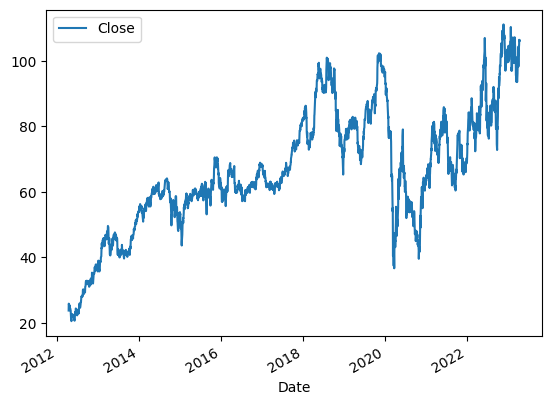

In [6]:
sp500.plot.line(y="Close", use_index=True)

In [7]:
del sp500["Dividends"]
del sp500["Stock Splits"]

In [8]:
sp500["Tomorrow"] = sp500["Close"].shift(-1)

In [9]:
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)

In [10]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
2012-04-12 00:00:00-04:00,23.186567,23.856013,22.314891,23.709572,654700,25.801588,1
2012-04-13 00:00:00-04:00,23.709567,26.115392,23.646807,25.801588,1685000,25.487782,0
2012-04-16 00:00:00-04:00,25.801585,25.801585,25.097273,25.487782,550200,25.104263,0
2012-04-17 00:00:00-04:00,25.383201,25.627269,25.104263,25.104263,179600,25.104263,0
2012-04-18 00:00:00-04:00,25.104263,25.411092,24.058252,25.104263,207100,25.104263,0
...,...,...,...,...,...,...,...
2023-04-10 00:00:00-04:00,103.010002,105.459999,103.000000,104.959999,2887700,106.459999,1
2023-04-11 00:00:00-04:00,105.800003,107.330002,105.169998,106.459999,2484100,106.029999,0
2023-04-12 00:00:00-04:00,106.669998,107.470001,105.860001,106.029999,3192500,106.269997,1


In [11]:
sp500["Target"].value_counts()

1    1448
0    1322
Name: Target, dtype: int64

In [12]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=100, random_state=1)

train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, n_estimators=200, random_state=1)

In [13]:
preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)
precision_score(test["Target"], preds)

0.631578947368421

<Axes: xlabel='Date'>

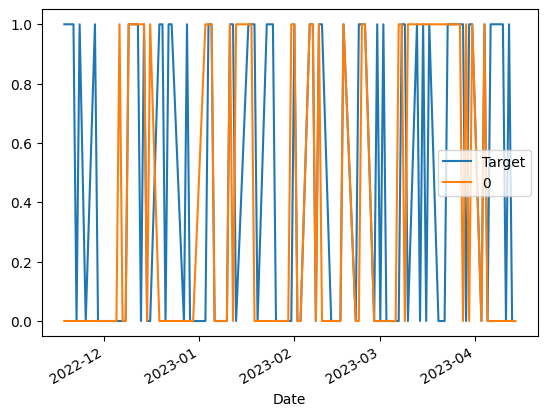

In [14]:
combined = pd.concat([test["Target"], preds], axis=1)
combined.plot()

In [15]:
def predict(train, test, predictors, model):
  model.fit(train[predictors], train["Target"])
  preds = model.predict(test[predictors])
  preds = pd.Series(preds, index=test.index, name="Predictions")
  combined = pd.concat([test["Target"], preds], axis=1)
  return combined

In [16]:
def backtest(data, model, predictors, start=500, step=250):
  all_predictions = []

  for i in range(start, data.shape[0], step):
      train = data.iloc[0:i].copy()
      test = data.iloc[i:(i+step)].copy()
      predictions = predict(train, test, predictors, model)
      all_predictions.append(predictions)
      print(pd.concat(all_predictions))
  
  return pd.concat(all_predictions)

In [17]:
predictions = backtest(sp500, model, predictors)

                           Target  Predictions
Date                                          
2014-04-09 00:00:00-04:00       0            1
2014-04-10 00:00:00-04:00       1            0
2014-04-11 00:00:00-04:00       1            0
2014-04-14 00:00:00-04:00       1            0
2014-04-15 00:00:00-04:00       1            0
...                           ...          ...
2015-03-31 00:00:00-04:00       1            0
2015-04-01 00:00:00-04:00       0            0
2015-04-02 00:00:00-04:00       1            0
2015-04-06 00:00:00-04:00       0            0
2015-04-07 00:00:00-04:00       0            0

[250 rows x 2 columns]
                           Target  Predictions
Date                                          
2014-04-09 00:00:00-04:00       0            1
2014-04-10 00:00:00-04:00       1            0
2014-04-11 00:00:00-04:00       1            0
2014-04-14 00:00:00-04:00       1            0
2014-04-15 00:00:00-04:00       1            0
...                           ...   

In [18]:
predictions["Predictions"].value_counts()

0    1373
1     897
Name: Predictions, dtype: int64

In [19]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5172798216276477

In [20]:
predictions["Target"].value_counts() / predictions.shape[0]

1    0.522026
0    0.477974
Name: Target, dtype: float64

In [21]:
horizons = [2,5,60,250]
new_predictors = []

for horizon in horizons:
  rolling_averages = sp500.rolling(horizon).mean()
  
  ratio_column = f"Close_Ratio_{horizon}"
  sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"]
  
  trend_column = f"Trend_{horizon}"
  sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]
  
  new_predictors+= [ratio_column, trend_column]

In [22]:
sp500 = sp500.dropna(subset=sp500.columns[sp500.columns != "Tomorrow"])

In [23]:
sp500.shape

(2520, 15)

In [24]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [25]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >= .55] = 1
    preds[preds < .55] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [26]:
predictions = backtest(sp500, model, new_predictors)

                           Target  Predictions
Date                                          
2015-04-08 00:00:00-04:00       1          1.0
2015-04-09 00:00:00-04:00       1          0.0
2015-04-10 00:00:00-04:00       0          0.0
2015-04-13 00:00:00-04:00       1          1.0
2015-04-14 00:00:00-04:00       1          0.0
...                           ...          ...
2016-03-29 00:00:00-04:00       1          1.0
2016-03-30 00:00:00-04:00       0          1.0
2016-03-31 00:00:00-04:00       0          1.0
2016-04-01 00:00:00-04:00       1          1.0
2016-04-04 00:00:00-04:00       0          0.0

[250 rows x 2 columns]
                           Target  Predictions
Date                                          
2015-04-08 00:00:00-04:00       1          1.0
2015-04-09 00:00:00-04:00       1          0.0
2015-04-10 00:00:00-04:00       0          0.0
2015-04-13 00:00:00-04:00       1          1.0
2015-04-14 00:00:00-04:00       1          0.0
...                           ...   

In [27]:
predictions["Predictions"].value_counts()

0.0    1261
1.0     759
Name: Predictions, dtype: int64

In [28]:
precision_score(predictions["Target"], predictions["Predictions"])

0.52832674571805

In [29]:
predictions["Target"].value_counts() / predictions.shape[0]

1    0.525248
0    0.474752
Name: Target, dtype: float64

In [30]:
predictions

,Target,Predictions
Date,,
2015-04-08 00:00:00-04:00,1,1.0
2015-04-09 00:00:00-04:00,1,0.0
2015-04-10 00:00:00-04:00,0,0.0
2015-04-13 00:00:00-04:00,1,1.0
2015-04-14 00:00:00-04:00,1,0.0
...,...,...
2023-04-10 00:00:00-04:00,1,0.0
2023-04-11 00:00:00-04:00,0,0.0
2023-04-12 00:00:00-04:00,1,0.0


<Axes: xlabel='Date'>

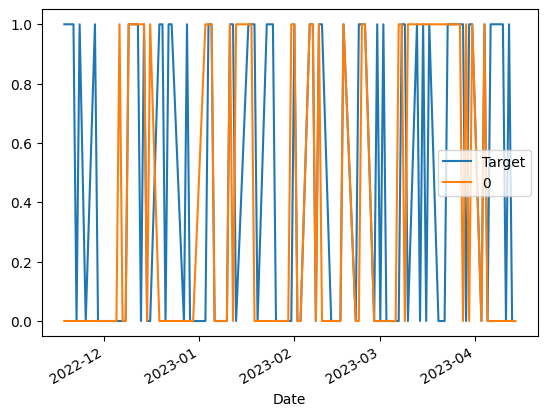

In [31]:
combined = pd.concat([test["Target"], preds], axis=1)
combined.plot()